In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import adfuller,SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [472]:
#IMPORTING DATA
df=pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls',index_col='Order Date',parse_dates=True)
df.shape

(9994, 20)

In [4]:
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.tail()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-21,9990,CA-2014-110422,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
2017-02-26,9991,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
2017-02-26,9992,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
2017-02-26,9993,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
2017-05-04,9994,CA-2017-119914,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [6]:
df.sort_index(inplace=True)

In [7]:
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-03,7981,CA-2014-103800,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2014-01-04,740,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2014-01-04,741,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
2014-01-04,742,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2014-01-05,1760,CA-2014-141817,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [8]:
ts = df[['Category','Sales']]
ts

,Category,Sales
Order Date,,
2014-01-03,Office Supplies,16.448
2014-01-04,Office Supplies,11.784
2014-01-04,Office Supplies,272.736
2014-01-04,Office Supplies,3.540
2014-01-05,Office Supplies,19.536
...,...,...
2017-12-30,Office Supplies,3.024
2017-12-30,Office Supplies,52.776
2017-12-30,Technology,90.930


In [11]:
np.unique(ts.Category)

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [38]:
ind_o = np.where(ts.Category=='Office Supplies')

In [39]:
ind_f = np.where(ts.Category=='Furniture')

In [40]:
ind_t = np.where(ts.Category=='Technology')

In [47]:
office = ts.iloc[ind_o]
office = office[['Sales']]
office.shape

(6026, 1)

In [48]:
Furniture = ts.iloc[ind_f]
Furniture = Furniture[['Sales']]
Furniture.shape

(2121, 1)

In [49]:
Tech = ts.iloc[ind_t]
Tech = Tech[['Sales']]
Tech.shape

(1847, 1)

# Interpretation
 - The Office supplies category has maximum number of products sold in the Sales Data

In [50]:
#RESAMPLING DATA MONTHWISE 
ts.office = office.resample("MS").sum()
ts.fur = Furniture.resample("MS").sum()
ts.tech = Tech.resample("MS").sum()

In [20]:
#ADF test for checking stationarity of Data
def adftest(data):   
    adftest = adfuller(data)[1]
    print(adftest)
    if(adftest<0.05):
        print('stationary')
    else:
        print('not stationary use diff')

In [372]:
adftest(ts.office)

0.329487275494728
not stationary use diff


In [373]:
adftest(ts.fur)

8.450793985809654e-05
stationary


In [374]:
adftest(ts.tech)

1.8615967302063814e-06
stationary


In [55]:
print(ts.office.head(2),ts.office.tail(2))
print(ts.office.shape)

               Sales
Order Date          
2014-01-01  4851.080
2014-02-01  1071.724                 Sales
Order Date           
2017-11-01  31472.337
2017-12-01  30436.942
(48, 1)


In [56]:
print(ts.fur.head(2),ts.fur.tail(2))
print(ts.fur.shape)

               Sales
Order Date          
2014-01-01  6242.525
2014-02-01  1839.658                  Sales
Order Date            
2017-11-01  37056.7150
2017-12-01  31407.4668
(48, 1)


In [57]:
print(ts.tech.head(2),ts.tech.tail(2))
print(ts.tech.shape)

              Sales
Order Date         
2014-01-01  3143.29
2014-02-01  1608.51                 Sales
Order Date           
2017-11-01  49918.773
2017-12-01  21984.910
(48, 1)


# EDA

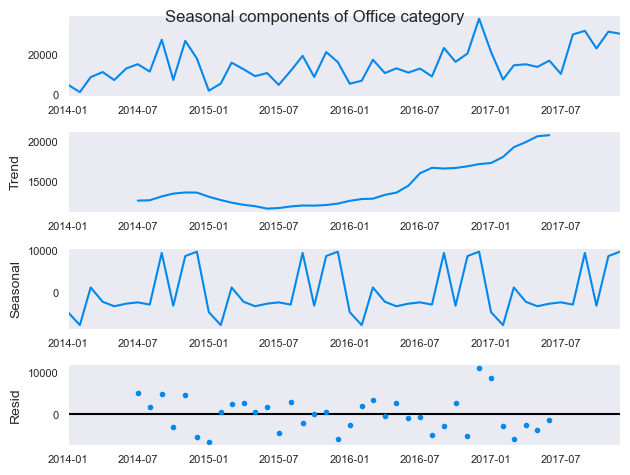

In [375]:
seasonal_decompose(ts.office,period=12).plot()
plt.suptitle('Seasonal components of Office category')
plt.show()

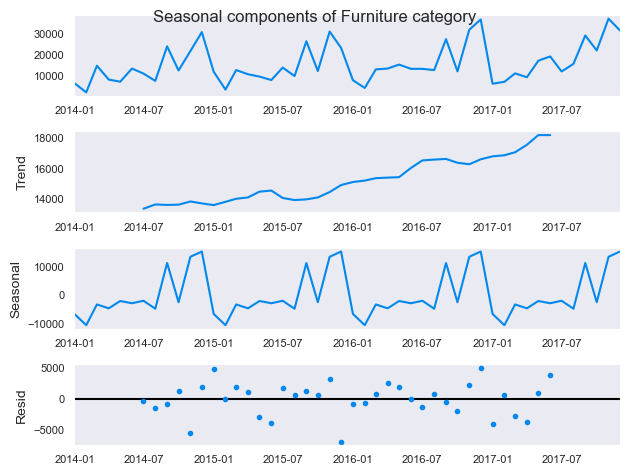

In [377]:
seasonal_decompose(ts.fur,period=12).plot()
plt.suptitle('Seasonal components of Furniture category')
plt.show()

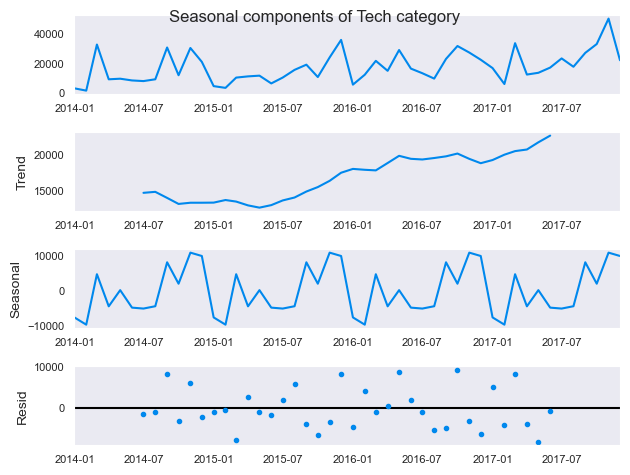

In [378]:
seasonal_decompose(ts.tech,period=12).plot()
plt.suptitle('Seasonal components of Tech category')
plt.show()

# Interpretation
 - There is trend/seasonality observed in the data 

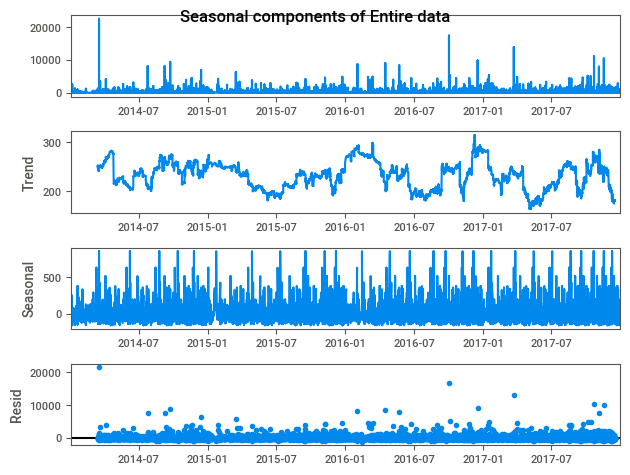

In [112]:
seasonal_decompose(data,period=365).plot()
plt.suptitle('Seasonal components of Entire data')
plt.show()

# Univariate analysis

In [82]:
import sweetviz as sv

                                             |                                             | [  0%]   00:00 ->…


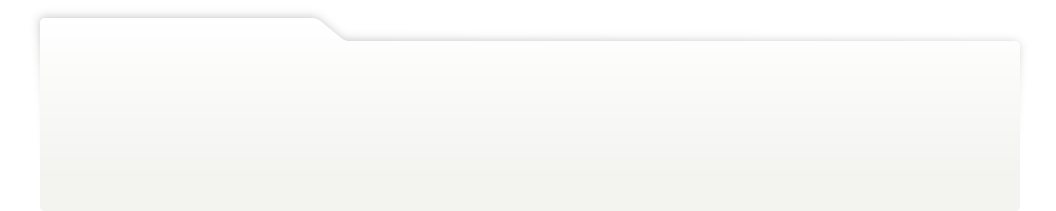
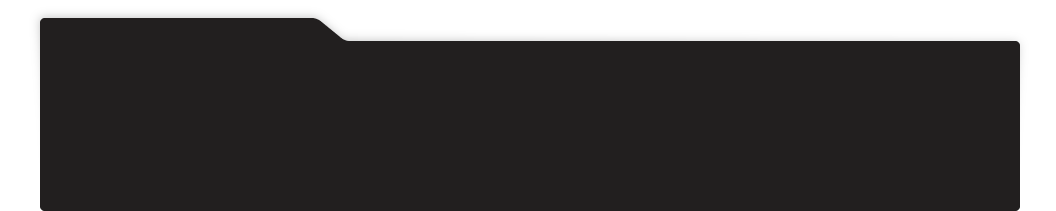
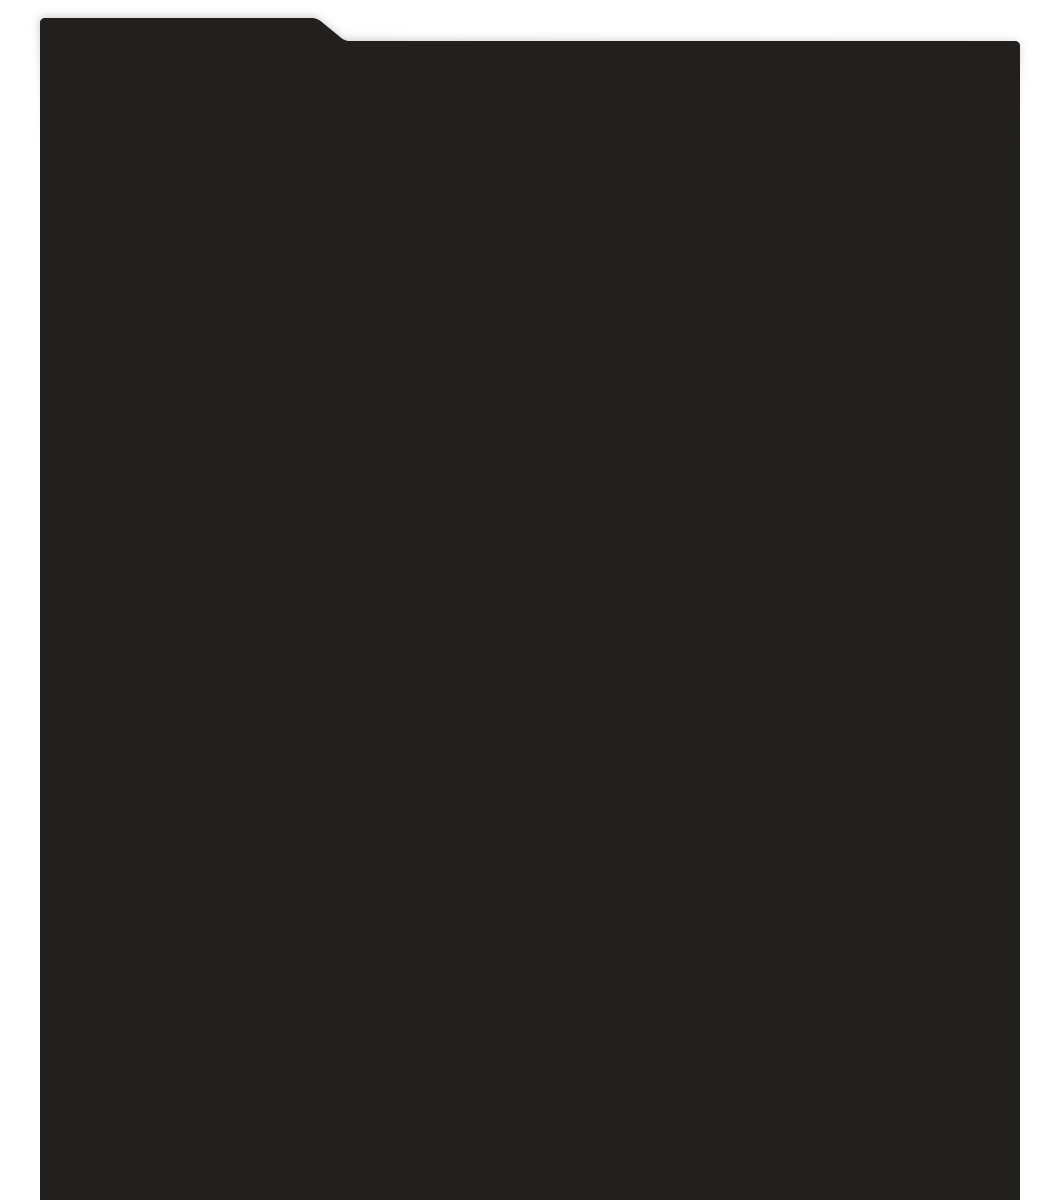
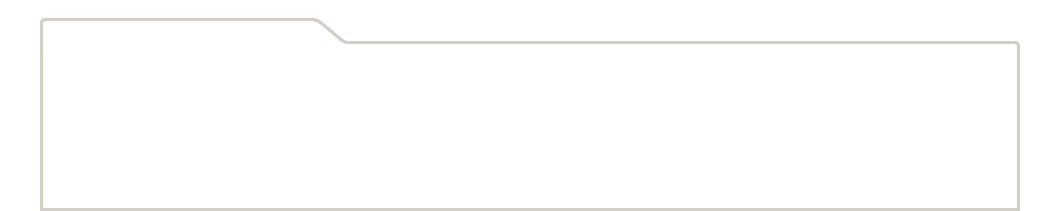
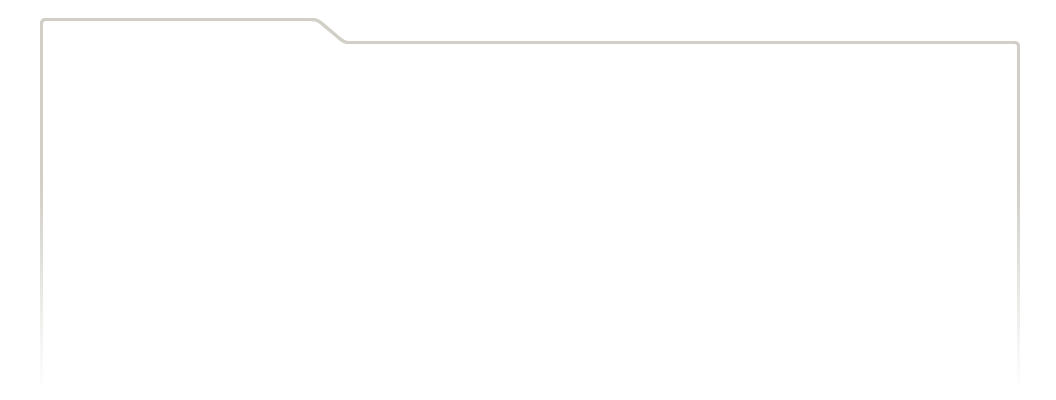
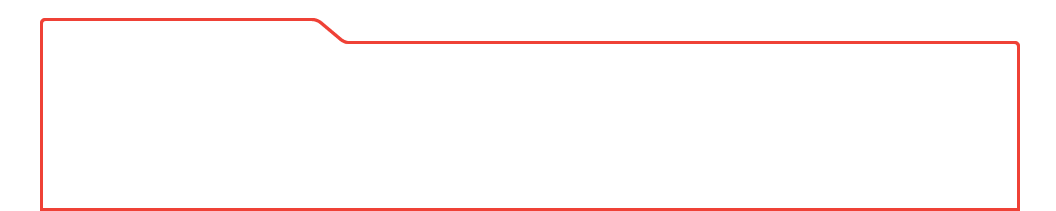
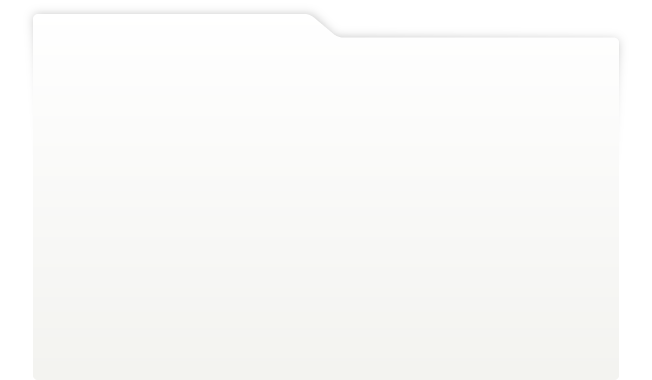
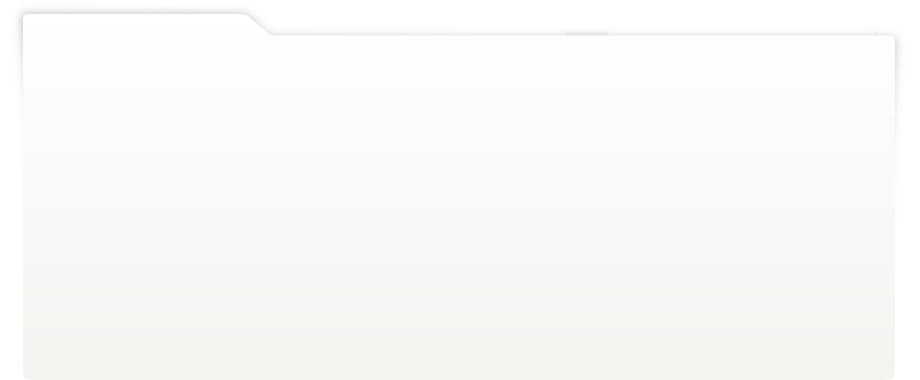
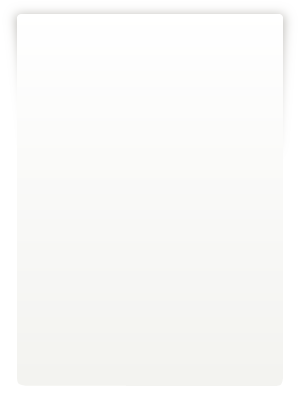
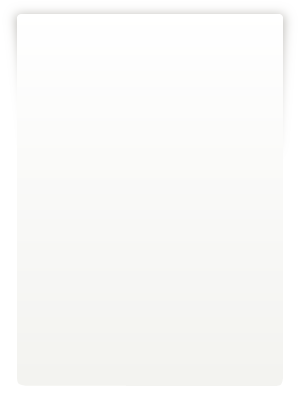
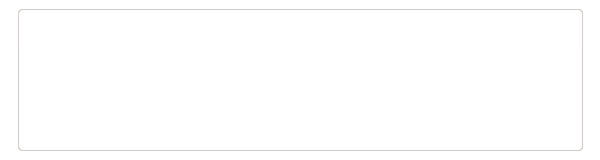
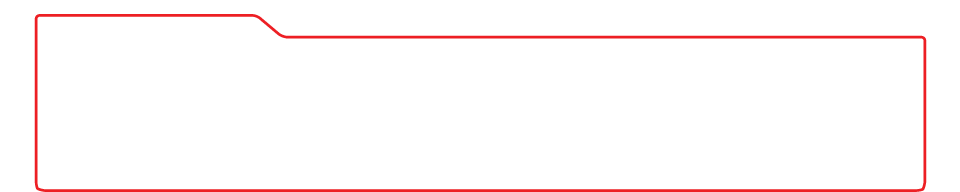
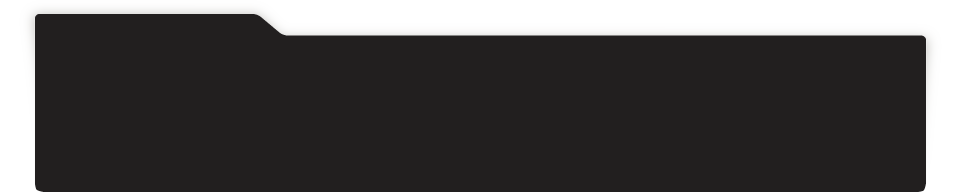
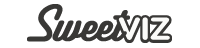
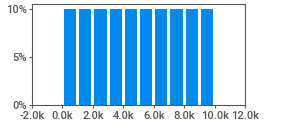
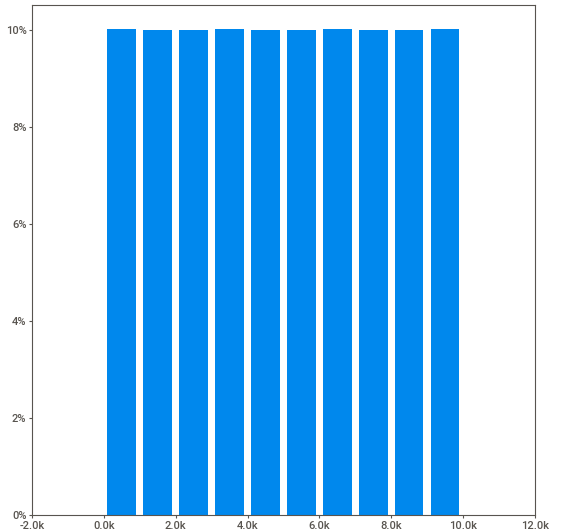
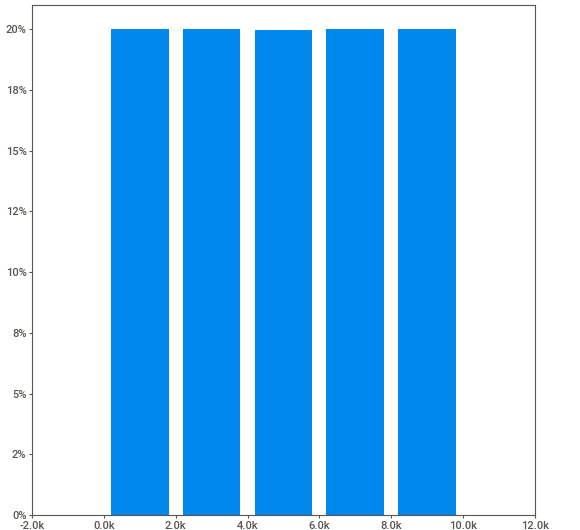
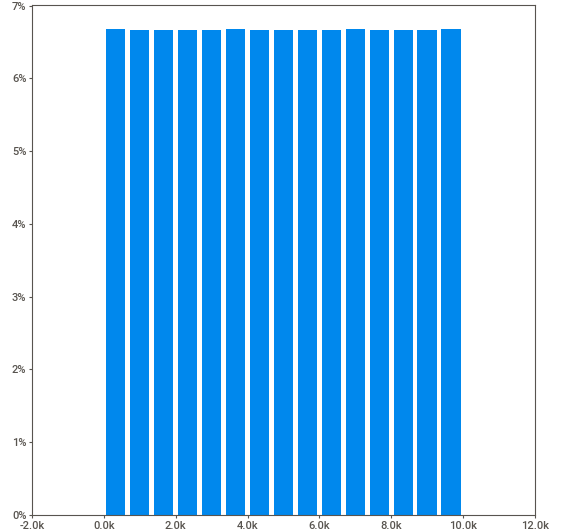
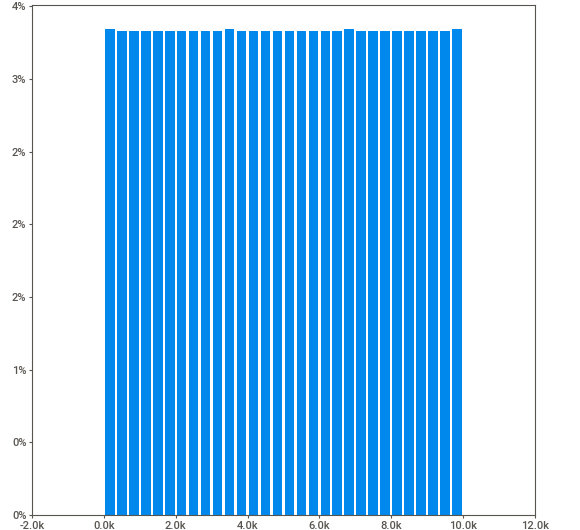
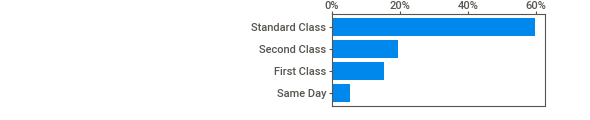
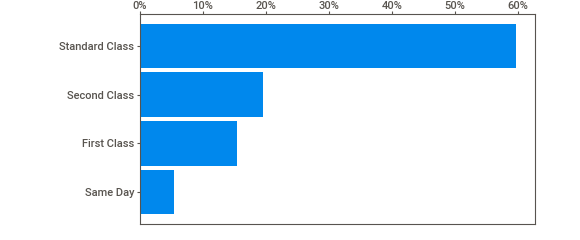
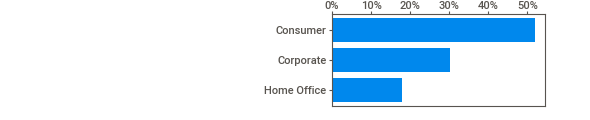
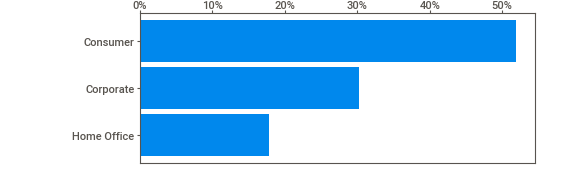
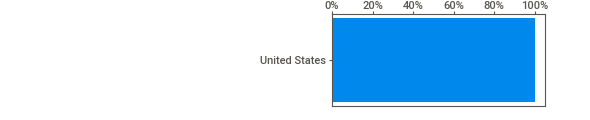
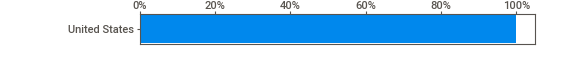
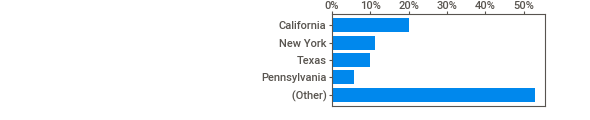
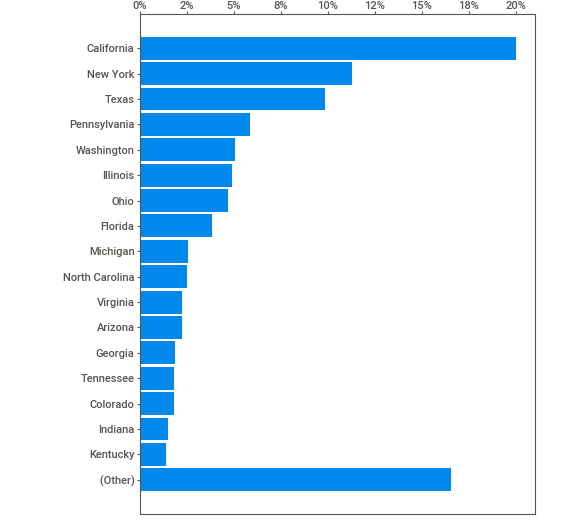
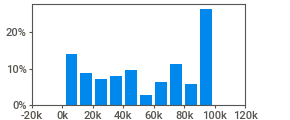
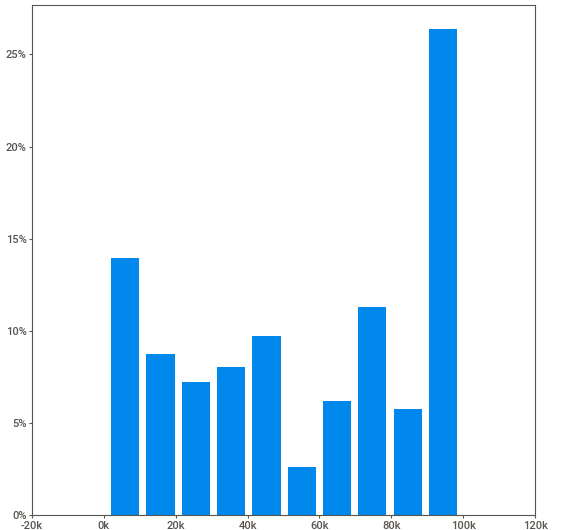
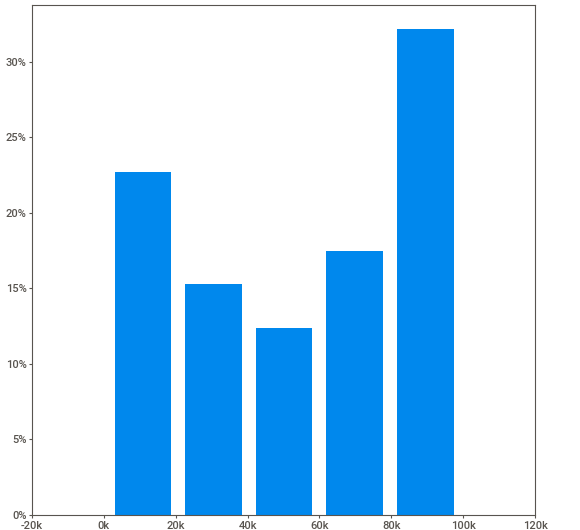
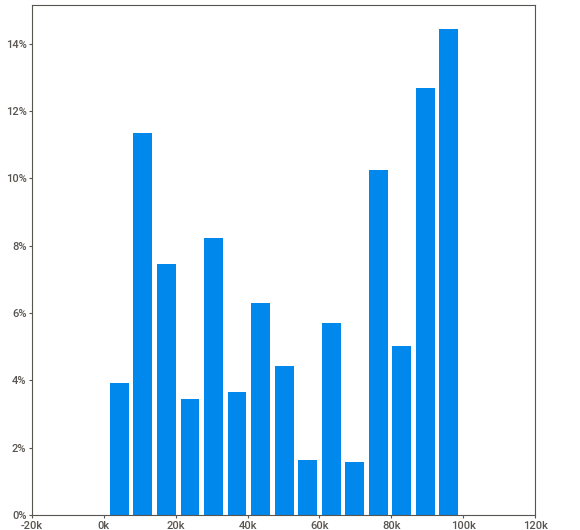
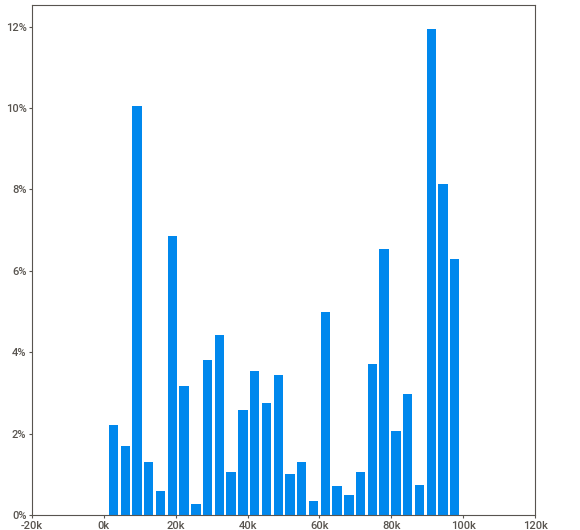
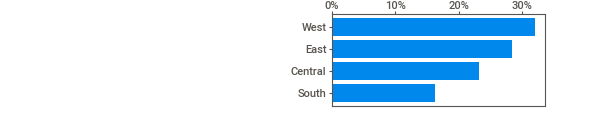
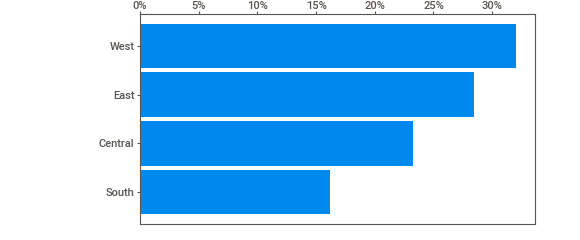
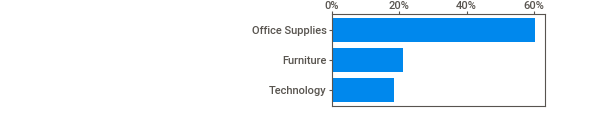
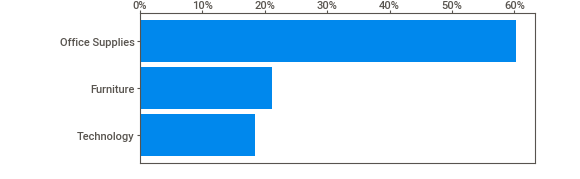
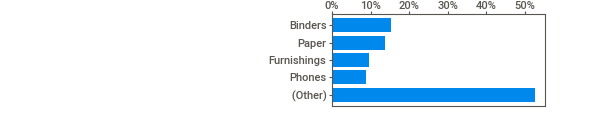
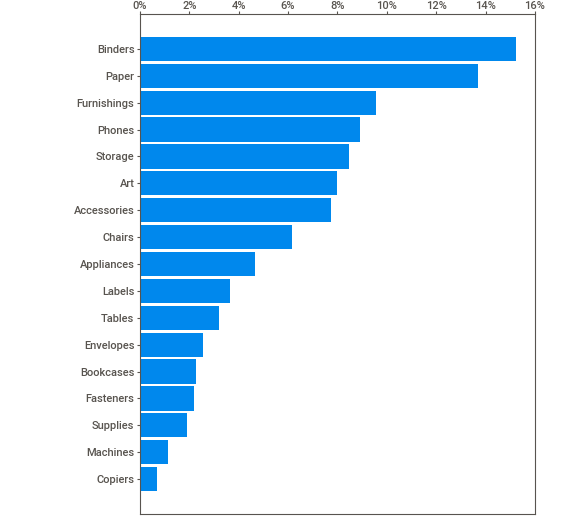
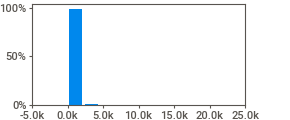
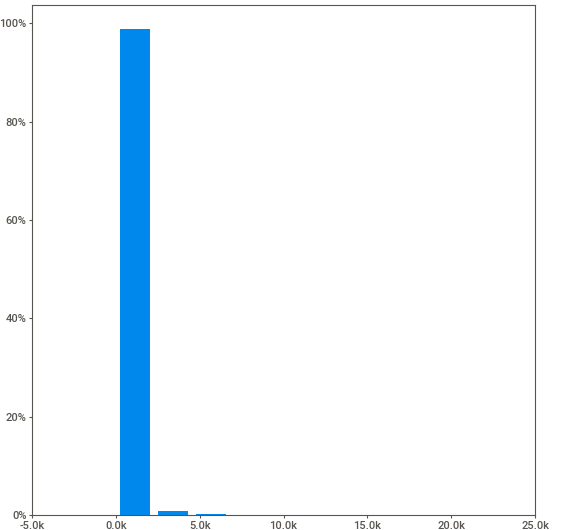
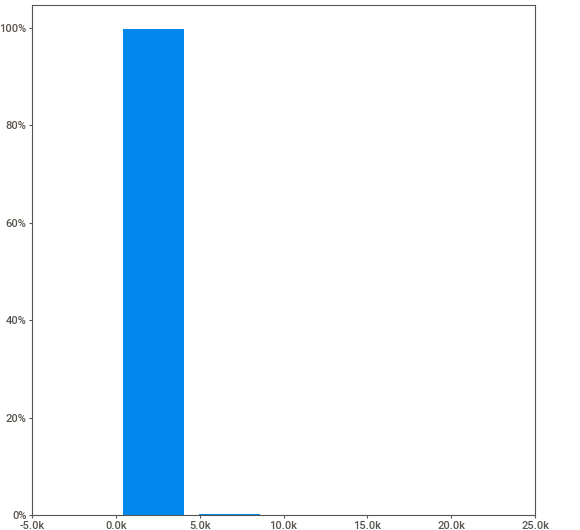
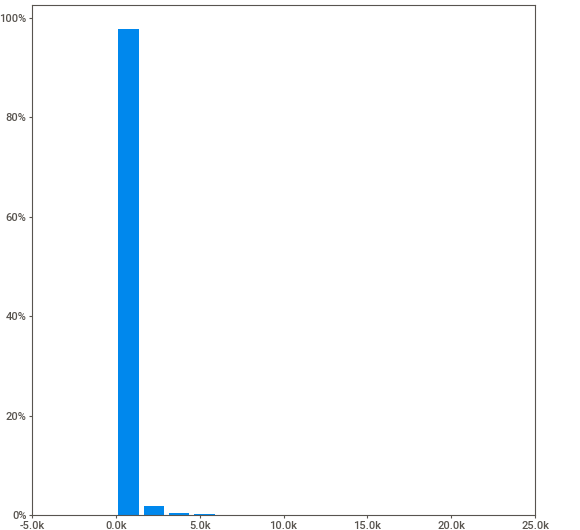
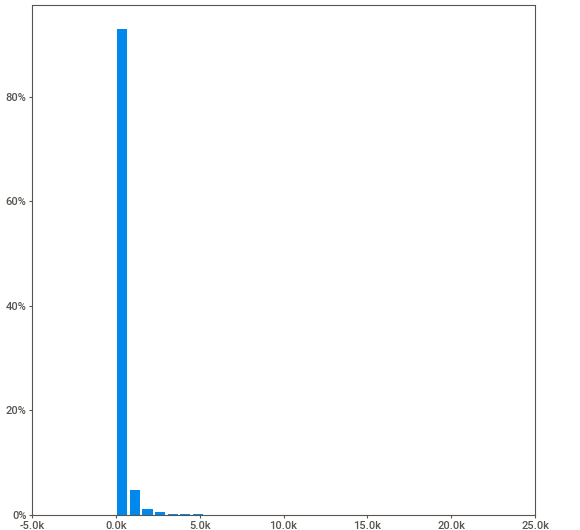
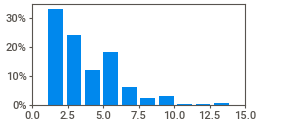
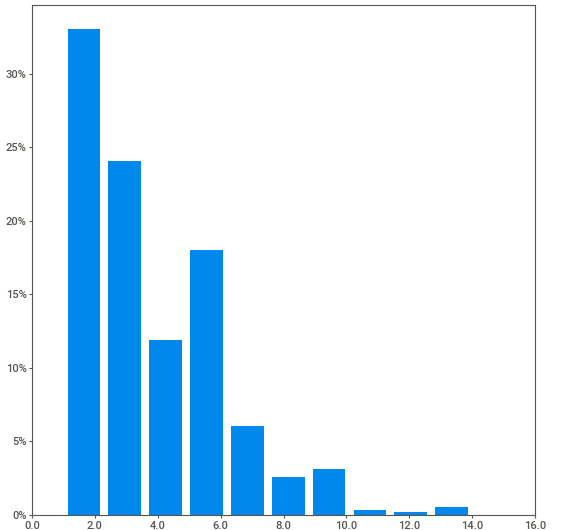
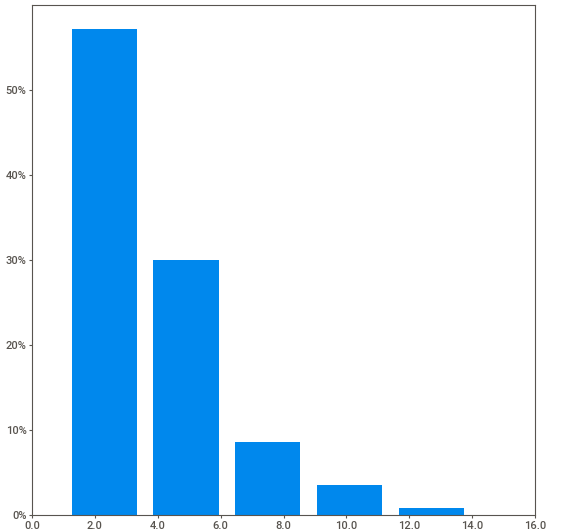
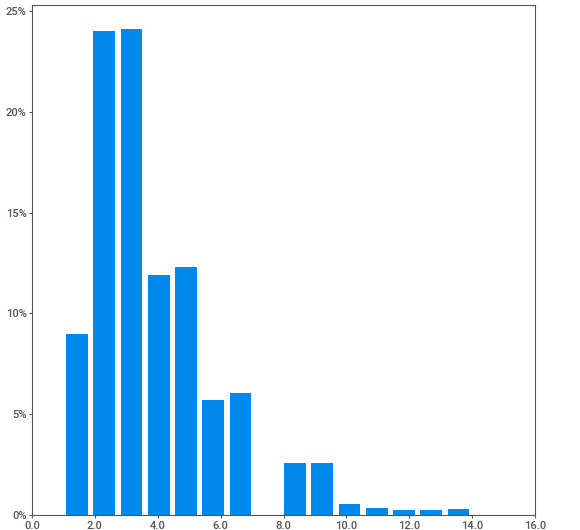
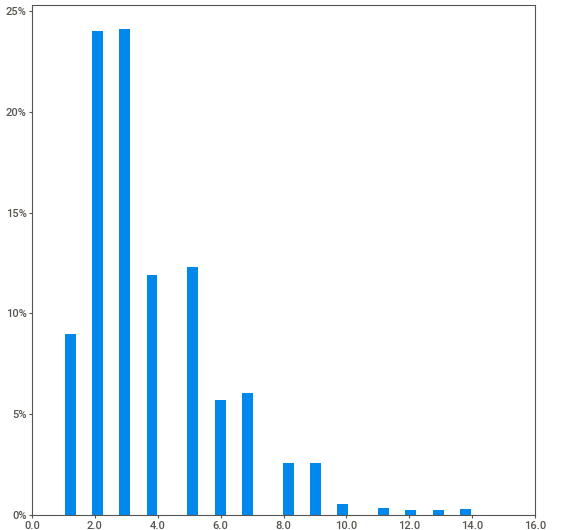
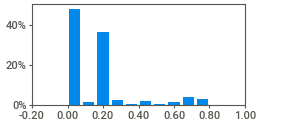
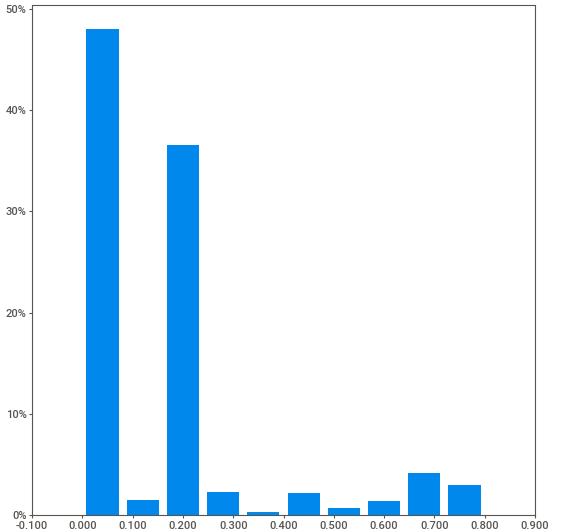
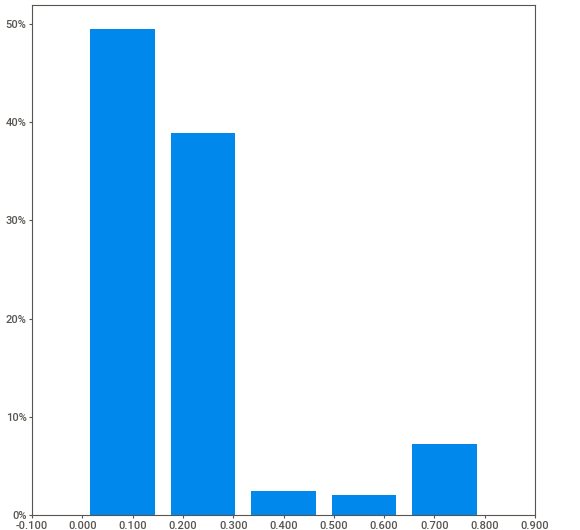
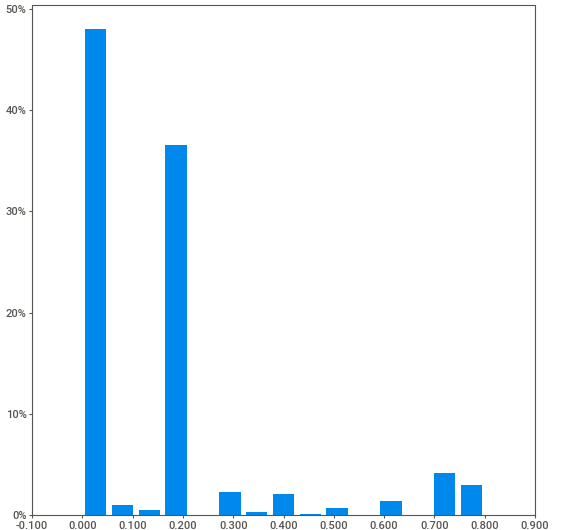
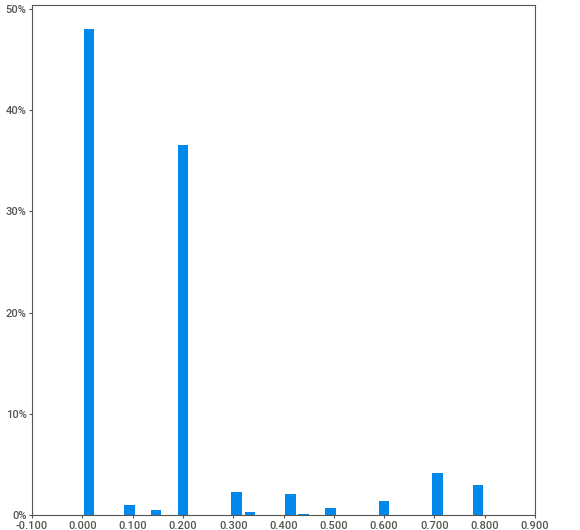
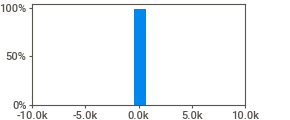
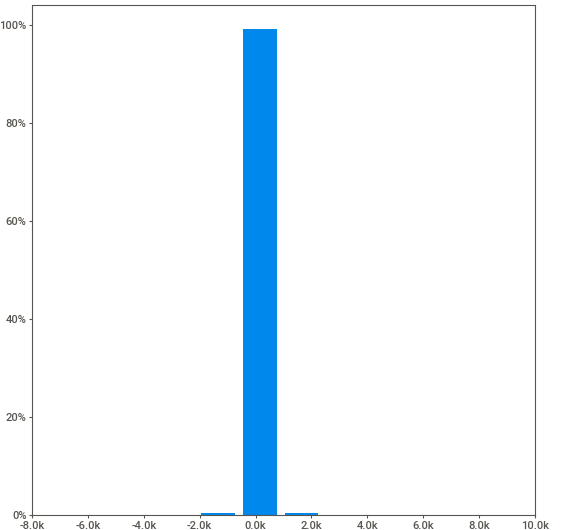
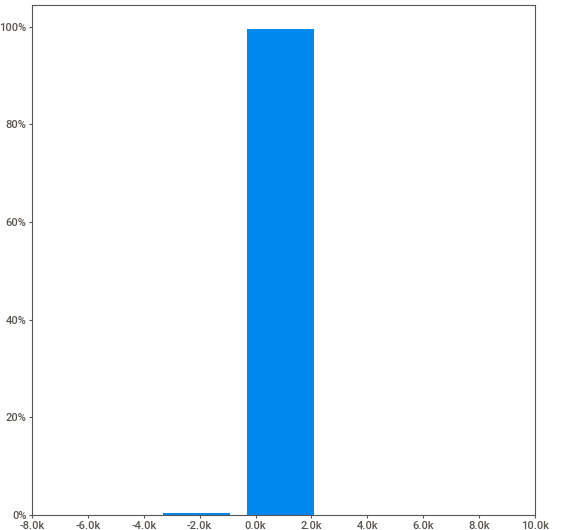
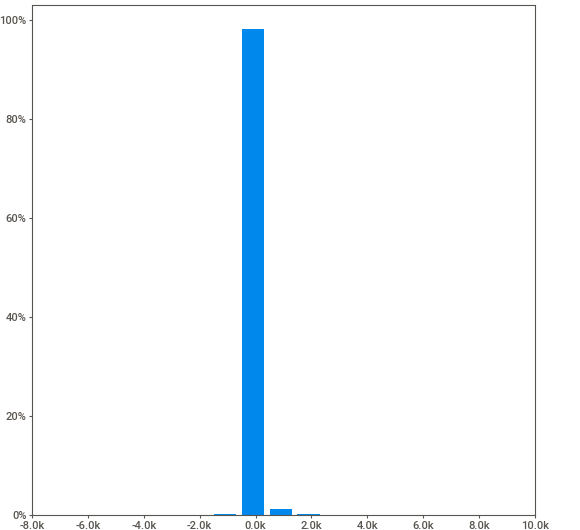
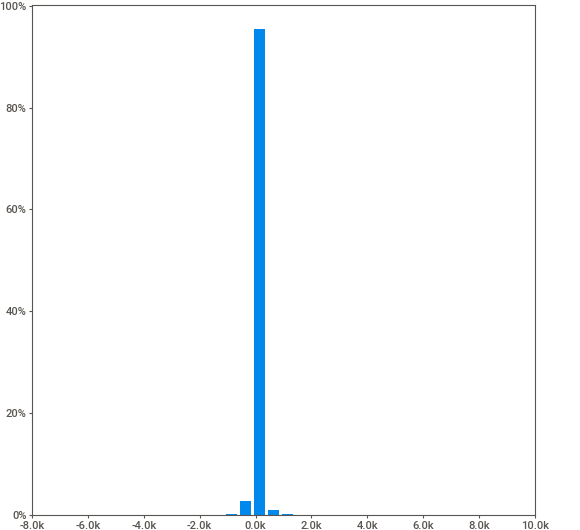
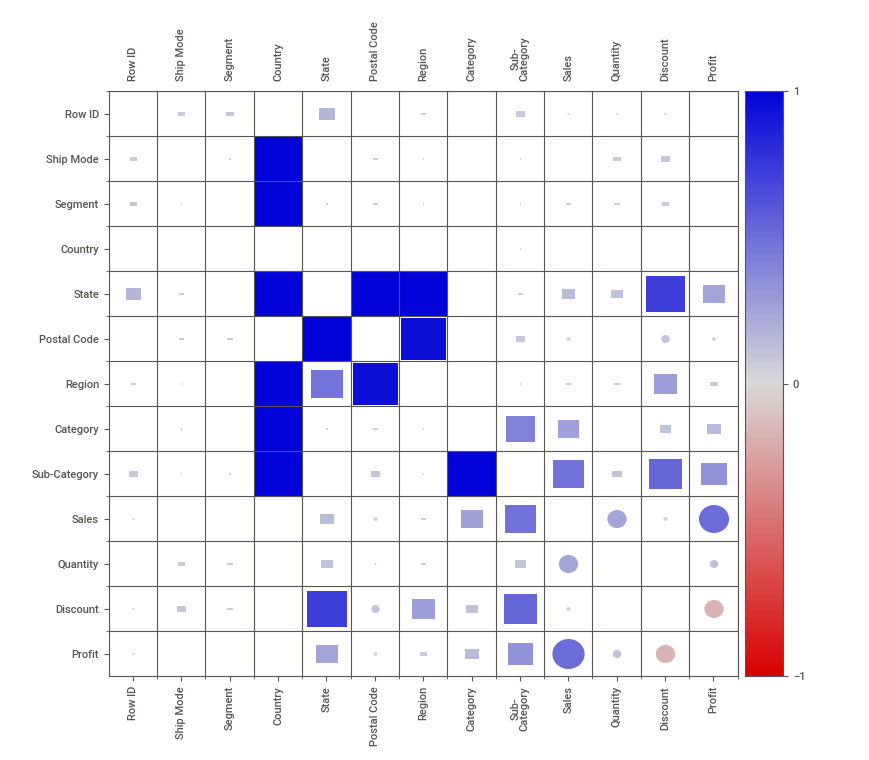
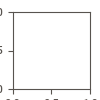

In [83]:
eda_report = sv.analyze(df)
eda_report.show_notebook()

In [61]:
cat_df = df.select_dtypes(include = 'object')
num_df = df.select_dtypes(exclude= 'object')
print(cat_df.columns,num_df.columns)

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name'],
      dtype='object') Index(['Row ID', 'Ship Date', 'Postal Code', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


# Bivariate analysis & Multivariate analysis

In [476]:
import ipywidgets as w
from ipywidgets import interact

@interact(x=w.Dropdown(options=['Segment','Country', 'Region','Ship Mode']),
         y= w.Dropdown(options=['Sales', 'Quantity', 'Discount','Profit']),
         z=w.Dropdown(options=['bar','box','swarm','point']))
def viz(x,y,z):
    plt.figure(figsize=(20,20))
    sns.set_style('dark')
    sns.catplot(x='Category',y=y,data=df,kind=z,col=x,palette='Set1')
    plt.show()

interactive(children=(Dropdown(description='x', options=('Segment', 'Country', 'Region', 'Ship Mode'), value='…

In [477]:
@interact(st=w.Dropdown(options=['Sales', 'Quantity', 'Discount','Profit']))
def state(st):    
    plt.figure(figsize=(10,8))
    df.groupby('State')[st].sum().plot(kind='barh')
    plt.title(f'statewise {st}')
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='st', options=('Sales', 'Quantity', 'Discount', 'Profit'), value='S…

In [180]:
@interact(sub=w.Dropdown(options=['Sales', 'Quantity', 'Discount','Profit']))
def subcat(sub):    
    plt.figure(figsize=(10,8))
    df.groupby('Sub-Category')[sub].sum().plot(kind='barh')
    plt.title(f'subcategorywise {sub}')
    plt.show()

interactive(children=(Dropdown(description='sub', options=('Sales', 'Quantity', 'Discount', 'Profit'), value='…

In [200]:
@interact(cat=w.Dropdown(options=['Ship Mode','Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region','Category',
       'Sub-Category', 'Product Name']))
def count(cat):
    plt.figure(figsize=(10,8))
    sns.countplot(cat,data=cat_df,hue='Category')
    plt.show()

interactive(children=(Dropdown(description='cat', options=('Ship Mode', 'Customer Name', 'Segment', 'Country',…

In [198]:
@interact(col=w.Dropdown(options=['Sales', 'Quantity', 'Discount','Profit']))
def scatter(col):
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=num_df['Sales'],y=num_df[col])
    plt.title(f'scatterplot of Sales vs {col}')
    plt.show()

interactive(children=(Dropdown(description='col', options=('Sales', 'Quantity', 'Discount', 'Profit'), value='…

# AutoRegressive--AR(p) Model for Furniture prediction

In [205]:
from statsmodels.tsa.ar_model import AutoReg

In [208]:
rec = int(0.7*len(ts.fur))
train = ts.fur.iloc[:rec]
test = ts.fur.iloc[rec:]
print(train.shape,test.shape)

(33, 1) (15, 1)


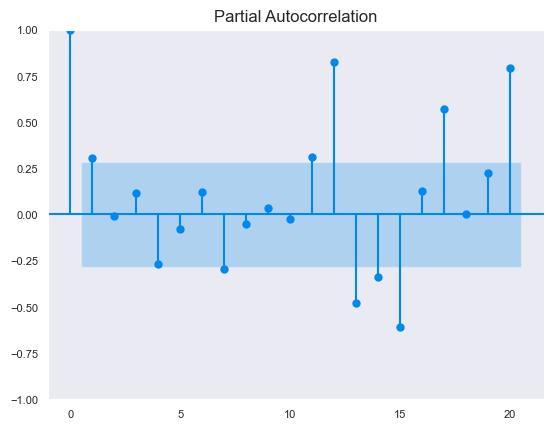

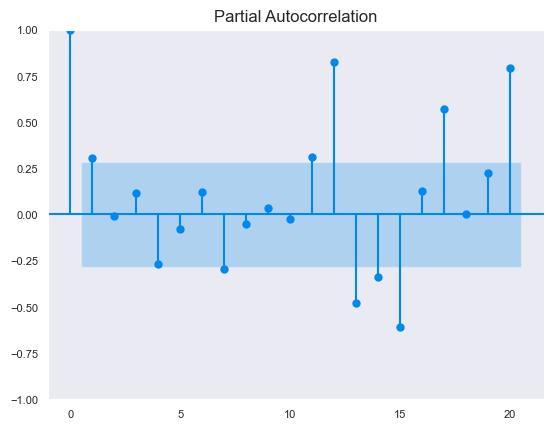

In [204]:
plot_pacf(ts.fur,lags=20)

In [210]:
for i in range(1,10):
    m= AutoReg(ts.fur,lags=i).fit()
    print(i, m.aic)

1 990.4757015212375
2 970.7467472903235
3 951.9496015524543
4 930.8338589029175
5 911.7708021358907
6 892.9999627634284
7 870.7912567359488
8 850.750357452311
9 832.9114635619001


In [397]:
fur_model = AutoReg(train,lags=9,seasonal=True).fit()
print(fur_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                   33
Model:               Seas. AutoReg(9)   Log Likelihood                -209.330
Method:               Conditional MLE   S.D. of innovations           1484.963
Date:                Tue, 31 Jan 2023   AIC                            462.660
Time:                        19:25:01   BIC                            488.577
Sample:                    10-01-2014   HQIC                           469.536
                         - 09-01-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7032.5486   1.17e+04     -0.599      0.549      -3e+04     1.6e+04
s(2,12)     -345.5421   6500.655     -0.053      0.958   -1.31e+04    1.24e+04
s(3,12)     7399.2514   7582.688      0.976      0.3

In [398]:
LJUNGBOX(fur_model)

[0.89188218]
Failure to reject H0,Good model


In [399]:
pred = fur_model.predict(len(train),len(ts.fur)-1)
pred

2016-10-01    12122.989479
2016-11-01    31545.842190
2016-12-01    30953.974380
2017-01-01    11385.117778
2017-02-01     6896.279780
2017-03-01    16387.491768
2017-04-01    11888.462272
2017-05-01    14379.797635
2017-06-01    14685.026459
2017-07-01    15132.588949
2017-08-01    13730.634324
2017-09-01    31042.746094
2017-10-01    14323.845904
2017-11-01    31012.253184
2017-12-01    31801.156802
Freq: MS, dtype: float64

In [217]:
from sklearn.metrics import mean_squared_error

In [249]:
def errorcheck(pred):    
    actual = []; p = []
    for i in range(len(pred)):
        actual.append(test.Sales[i])
        p.append(pred[i])
    df = pd.DataFrame({'actual':actual,'predicted':p})
    df['error'] = df.actual-df.predicted
    mse = mean_squared_error(df.actual,df.predicted)
    rmse = mean_squared_error(df.actual,df.predicted,squared=False)
    
    
    fig,ax = plt.subplots(1,2,figsize=(15,6))
    #plotting
    ax[0].plot(df.error)
    ax[0].set_title('Error plot')
    
    #plotting actual & predicted
    ax[1].plot(df.actual)
    ax[1].plot(df.predicted)
    ax[1].set_title('ACTUAL vs PREDiCTED')
    plt.show()
    
    return df,mse,rmse

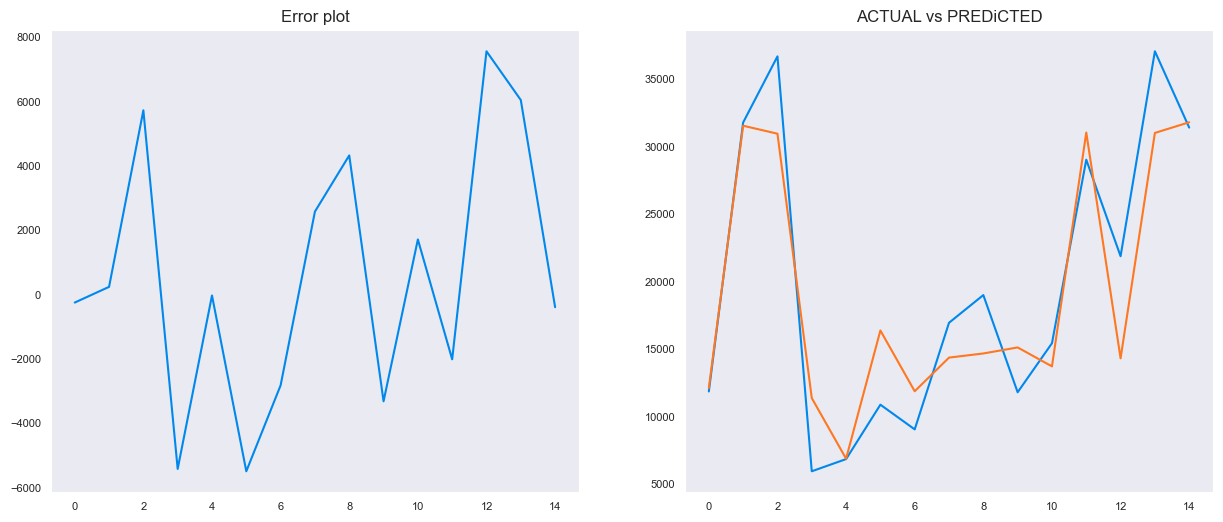

(        actual     predicted        error
 0   11872.5770  12122.989479  -250.412479
 1   31783.6288  31545.842190   237.786610
 2   36678.7150  30953.974380  5724.740620
 3    5964.0320  11385.117778 -5421.085778
 4    6866.3374   6896.279780   -29.942380
 5   10893.4448  16387.491768 -5494.046968
 6    9065.9581  11888.462272 -2822.504172
 7   16957.5582  14379.797635  2577.760565
 8   19008.5867  14685.026459  4323.560241
 9   11813.0220  15132.588949 -3319.566949
 10  15441.8740  13730.634324  1711.239676
 11  29028.2060  31042.746094 -2014.540094
 12  21884.0682  14323.845904  7560.222296
 13  37056.7150  31012.253184  6044.461816
 14  31407.4668  31801.156802  -393.690002,
 15841585.70379761,
 3980.148954976134)

In [400]:
errorcheck(pred)

# Moving Average-- MA(q) model for furniture prediction

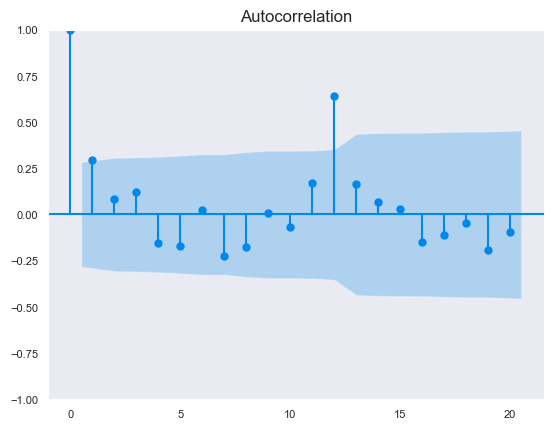

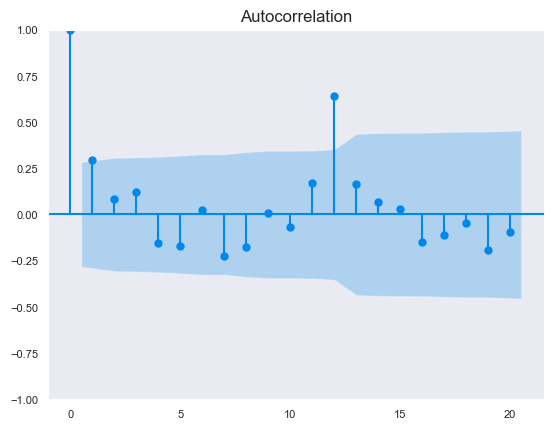

In [252]:
plot_acf(ts.fur,lags=20)

In [259]:
for i in range(1,3):
    m= ARIMA(ts.fur,order=(0,0,i)).fit()
    print(i, m.aic)

1 1011.8330449989652
2 1013.9567944533002


In [408]:
ma_fur = ARIMA(train,order=(0,0,1),trend='t').fit()
print(ma_fur.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -344.079
Date:                Tue, 31 Jan 2023   AIC                            694.158
Time:                        19:28:02   BIC                            698.647
Sample:                    01-01-2014   HQIC                           695.668
                         - 09-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           654.6419    115.332      5.676      0.000     428.595     880.689
ma.L1          0.3222      0.180      1.791      0.073      -0.030       0.675
sigma2      7.248e+07      0.000   1.62e+11      0.0

In [409]:
LJUNGBOX(ma_fur)

[0.85987229]
Failure to reject H0,Good model


In [410]:
start = len(train)
end = len(ts.fur)-1
p = ma_fur.predict(start,end)
p

2016-10-01    24781.214810
2016-11-01    22912.466018
2016-12-01    23567.107904
2017-01-01    24221.749790
2017-02-01    24876.391676
2017-03-01    25531.033562
2017-04-01    26185.675449
2017-05-01    26840.317335
2017-06-01    27494.959221
2017-07-01    28149.601107
2017-08-01    28804.242993
2017-09-01    29458.884880
2017-10-01    30113.526766
2017-11-01    30768.168652
2017-12-01    31422.810538
Freq: MS, Name: predicted_mean, dtype: float64

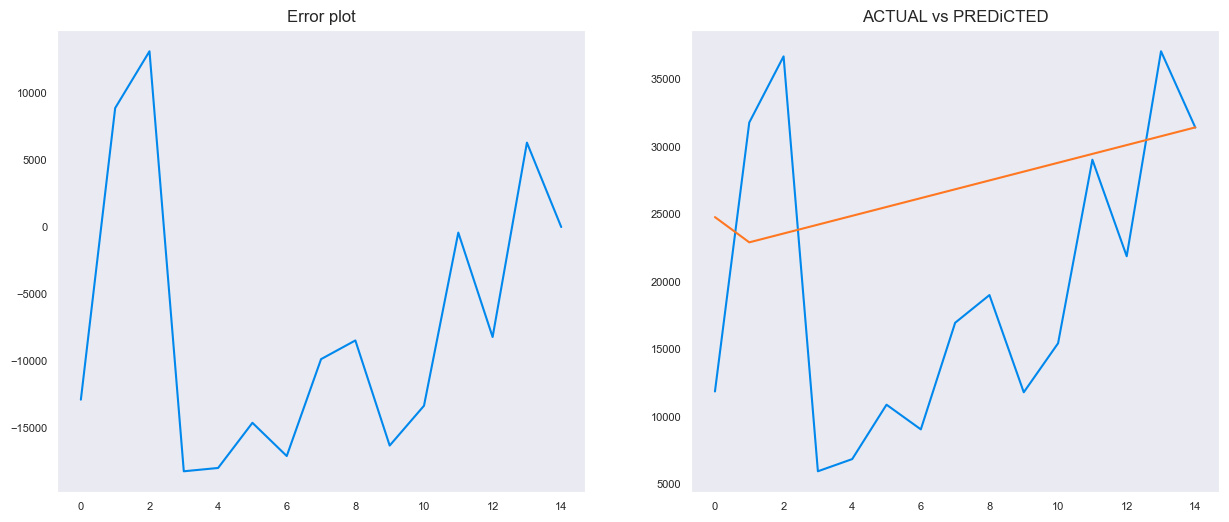

(        actual     predicted         error
 0   11872.5770  24781.214810 -12908.637810
 1   31783.6288  22912.466018   8871.162782
 2   36678.7150  23567.107904  13111.607096
 3    5964.0320  24221.749790 -18257.717790
 4    6866.3374  24876.391676 -18010.054276
 5   10893.4448  25531.033562 -14637.588762
 6    9065.9581  26185.675449 -17119.717349
 7   16957.5582  26840.317335  -9882.759135
 8   19008.5867  27494.959221  -8486.372521
 9   11813.0220  28149.601107 -16336.579107
 10  15441.8740  28804.242993 -13362.368993
 11  29028.2060  29458.884880   -430.678880
 12  21884.0682  30113.526766  -8229.458566
 13  37056.7150  30768.168652   6288.546348
 14  31407.4668  31422.810538    -15.343738,
 153658295.50604108,
 12395.898333966808)

In [411]:
errorcheck(p)

# ARMA model--ARMA(p,q) for furniture prediction

In [270]:
def Hyperparametertuning(data,pval,qval):
    results = []
    order = []
    for p in range(1,pval):
        for q in range(1,qval):
            model = ARIMA(data,order=(p,0,q)).fit()
            AIC=model.aic
            order.append([p,0,q])
            results.append(AIC)
    t = pd.DataFrame({'order':order,'AIC':results})
    t = t.sort_values('AIC')
    return t

In [272]:
Hyperparametertuning(ts.fur,10,2)

,order,AIC
0,"[1, 0, 1]",1013.550646
4,"[5, 0, 1]",1014.409661
1,"[2, 0, 1]",1015.541461
3,"[4, 0, 1]",1015.690641
2,"[3, 0, 1]",1016.257504
5,"[6, 0, 1]",1016.416536
6,"[7, 0, 1]",1016.839839
7,"[8, 0, 1]",1018.809477
8,"[9, 0, 1]",1020.746802


In [267]:
def LJUNGBOX(mod):
    pvalue = acorr_ljungbox(mod.resid,lags=[1],return_df=True)['lb_pvalue'].values
    print(pvalue)
    
    if(pvalue<0.05):
        print('Reject H0 , Bad model')
    else:
        print('Failure to reject H0,Good model')

In [412]:
arma_fur = ARIMA(train,order=(1,0,1),trend='t').fit()
print(arma_fur.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -342.407
Date:                Tue, 31 Jan 2023   AIC                            692.814
Time:                        19:31:27   BIC                            698.800
Sample:                    01-01-2014   HQIC                           694.828
                         - 09-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           654.6412    186.070      3.518      0.000     289.951    1019.331
ar.L1          0.7866      0.260      3.024      0.002       0.277       1.296
ma.L1         -0.4810      0.431     -1.115      0.2

In [413]:
LJUNGBOX(arma_fur)

[0.96161416]
Failure to reject H0,Good model


In [414]:
arma_pred = arma_fur.predict(start,end)

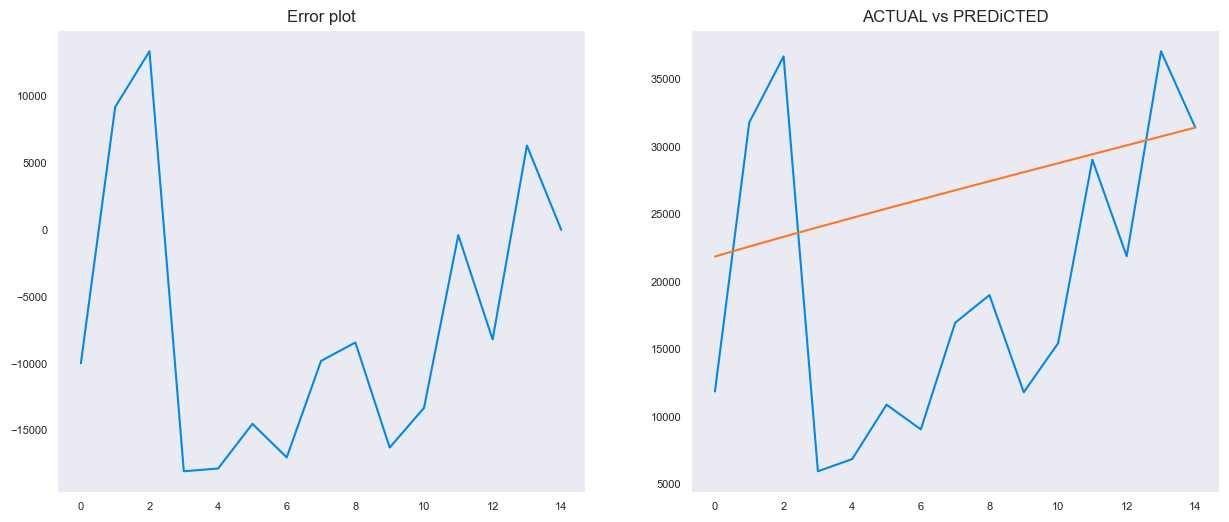

(        actual     predicted         error
 0   11872.5770  21861.729473  -9989.152473
 1   31783.6288  22600.886712   9182.742088
 2   36678.7150  23322.009447  13356.705553
 3    5964.0320  24028.945980 -18064.913980
 4    6866.3374  24724.723444 -17858.386044
 5   10893.4448  25411.723024 -14518.278224
 6    9065.9581  26091.817793 -17025.859693
 7   16957.5582  26766.481140  -9808.922940
 8   19008.5867  27436.872051  -8428.285351
 9   11813.0220  28103.902203 -16290.880203
 10  15441.8740  28768.288734 -13326.414734
 11  29028.2060  29430.595754   -402.389754
 12  21884.0682  30091.267001  -8207.198801
 13  37056.7150  30750.651526   6306.063474
 14  31407.4668  31409.023896     -1.557096,
 148396960.7993773,
 12181.829123714439)

In [415]:
errorcheck(arma_pred)

# Smoothing for furniture prediction

In [393]:
sim = SimpleExpSmoothing(ts.fur).fit(smoothing_level=0.6)
print(sim.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  Sales   No. Observations:                   48
Model:             SimpleExpSmoothing   SSE                     4046359772.230
Optimized:                       True   AIC                            879.994
Trend:                           None   BIC                            883.737
Seasonal:                        None   AICC                           880.925
Seasonal Periods:                None   Date:                 Tue, 31 Jan 2023
Box-Cox:                        False   Time:                         19:21:33
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.6000000                alpha                False
initial_level              6126.7711                

In [394]:
p = sim.predict(start,end)

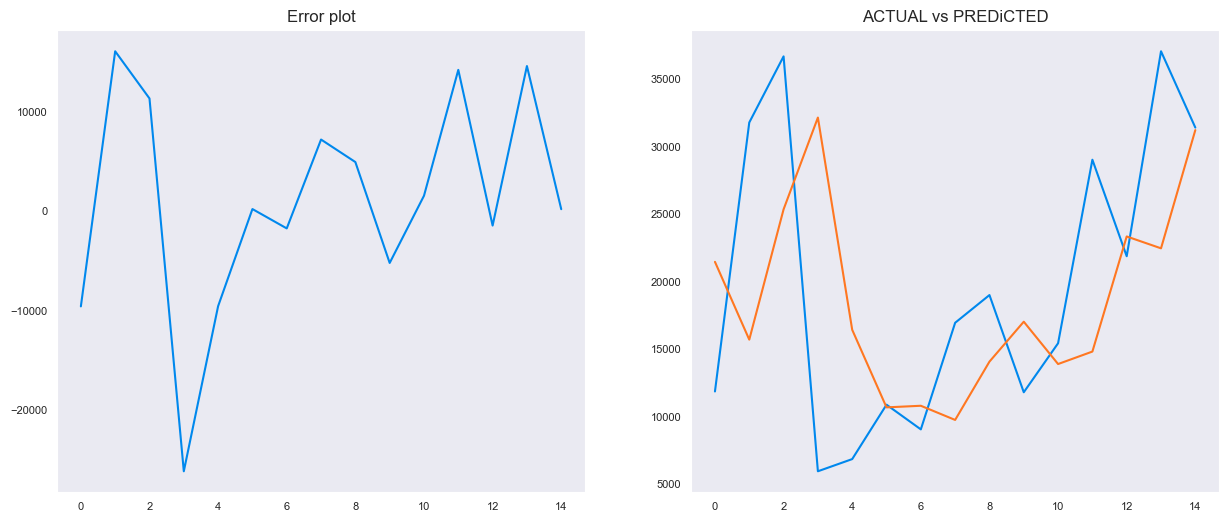

(        actual     predicted         error
 0   11872.5770  21468.135280  -9595.558280
 1   31783.6288  15710.800312  16072.828488
 2   36678.7150  25354.497405  11324.217595
 3    5964.0320  32149.027962 -26184.995962
 4    6866.3374  16438.030385  -9571.692985
 5   10893.4448  10695.014594    198.430206
 6    9065.9581  10814.072718  -1748.114618
 7   16957.5582   9765.203947   7192.354253
 8   19008.5867  14080.616499   4927.970201
 9   11813.0220  17037.398620  -5224.376620
 10  15441.8740  13902.772648   1539.101352
 11  29028.2060  14826.233459  14201.972541
 12  21884.0682  23347.416984  -1463.348784
 13  37056.7150  22469.407713  14587.307287
 14  31407.4668  31221.792085    185.674715,
 118756951.6372533,
 10897.566317176203)

In [395]:
errorcheck(p)

In [383]:
doub_sm = ExponentialSmoothing(ts.fur,trend='add',seasonal='multiplicative').fit()
print(doub_sm.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                      433145559.113
Optimized:                         True   AIC                            800.738
Trend:                         Additive   BIC                            830.678
Seasonal:                Multiplicative   AICC                           824.325
Seasonal Periods:                    12   Date:                 Tue, 31 Jan 2023
Box-Cox:                          False   Time:                         19:19:02
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0757143                alpha                 True
smoothing_trend          

In [384]:
doub_p = doub_sm.predict(start,end)

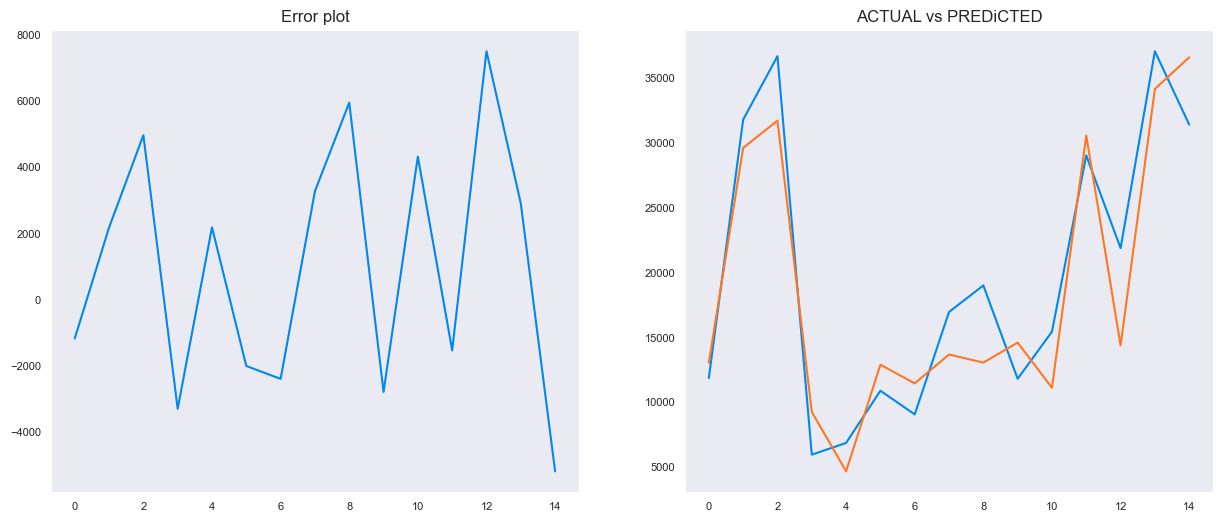

(        actual     predicted        error
 0   11872.5770  13044.817140 -1172.240140
 1   31783.6288  29607.697184  2175.931616
 2   36678.7150  31711.689561  4967.025439
 3    5964.0320   9261.101304 -3297.069304
 4    6866.3374   4683.383148  2182.954252
 5   10893.4448  12897.033085 -2003.588285
 6    9065.9581  11459.307530 -2393.349430
 7   16957.5582  13684.344923  3273.213277
 8   19008.5867  13059.245474  5949.341226
 9   11813.0220  14600.477465 -2787.455465
 10  15441.8740  11122.022457  4319.851543
 11  29028.2060  30561.080277 -1532.874277
 12  21884.0682  14383.429528  7500.638672
 13  37056.7150  34150.397464  2906.317536
 14  31407.4668  36590.836194 -5183.369394,
 14841433.684728354,
 3852.458135363492)

In [385]:
errorcheck(doub_p)

In [419]:
trip_sm = ExponentialSmoothing(ts.fur,trend='add',seasonal='multiplicative').fit(smoothing_level=0.6,smoothing_trend=0.2,smoothing_seasonal=0.2)
print(trip_sm.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                     1227382210.156
Optimized:                         True   AIC                            850.734
Trend:                         Additive   BIC                            880.673
Seasonal:                Multiplicative   AICC                           874.320
Seasonal Periods:                    12   Date:                 Tue, 31 Jan 2023
Box-Cox:                          False   Time:                         19:35:19
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6000000                alpha                False
smoothing_trend          

In [420]:
trip_p = trip_sm.predict(start,end)

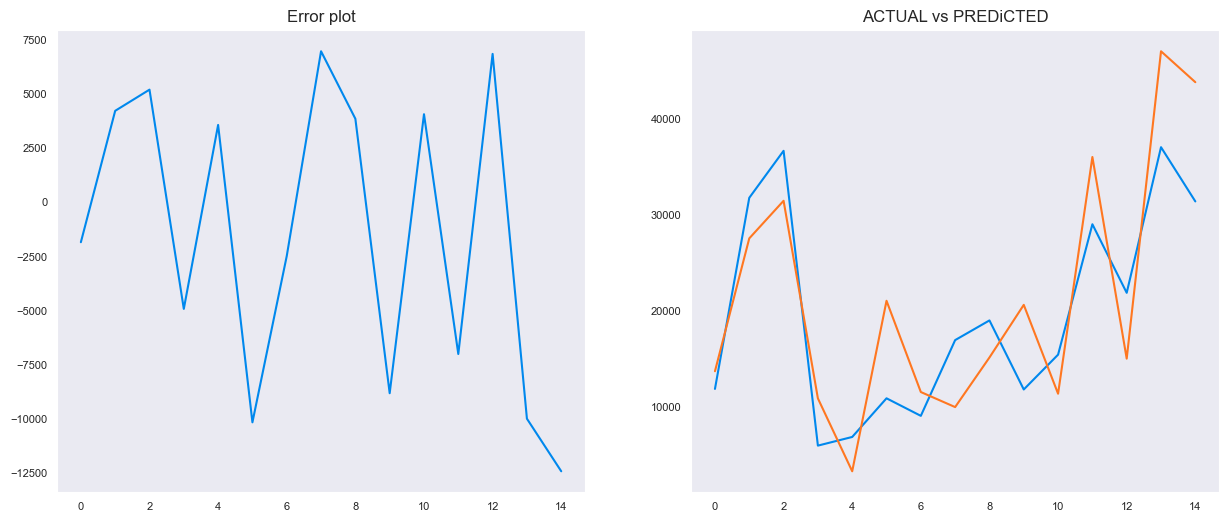

(        actual     predicted         error
 0   11872.5770  13714.217683  -1841.640683
 1   31783.6288  27556.053315   4227.575485
 2   36678.7150  31473.144726   5205.570274
 3    5964.0320  10886.318264  -4922.286264
 4    6866.3374   3291.060323   3575.277077
 5   10893.4448  21054.523870 -10161.079070
 6    9065.9581  11548.180699  -2482.222599
 7   16957.5582   9979.418105   6978.140095
 8   19008.5867  15147.171889   3861.414811
 9   11813.0220  20629.880787  -8816.858787
 10  15441.8740  11371.274877   4070.599123
 11  29028.2060  36033.765863  -7005.559863
 12  21884.0682  15026.766309   6857.301891
 13  37056.7150  47050.101621  -9993.386621
 14  31407.4668  43830.018304 -12422.551504,
 46865481.44940419,
 6845.836796871818)

In [421]:
errorcheck(trip_p)

In [422]:
final_comp = pd.DataFrame({'MODELS':['AR(P)','MA(Q)','ARMA','SIMPLE EXPONENTIAL','DOUBLE EXPONENTIAL','TRIPLE EXPONENTIAL'],
                          'MSE':[15841585.70379761, 153658295.50604108,148396960.7993773,118756951.6372533,14841433.684728354,46865481.44940419,],
                           'RMSE':[3980.148954976134,12395.898333966808, 12181.829123714439,10897.566317176203,3852.458135363492,6845.836796871818]})

In [423]:
final_comp

,MODELS,MSE,RMSE
0,AR(P),1.584159e+07,3980.148955
1,MA(Q),1.536583e+08,12395.898334
2,ARMA,1.483970e+08,12181.829124
3,SIMPLE EXPONENTIAL,1.187570e+08,10897.566317
4,DOUBLE EXPONENTIAL,1.484143e+07,3852.458135
5,TRIPLE EXPONENTIAL,4.686548e+07,6845.836797


Text(0.5, 1.0, 'TRIPLEEXPMODEL')

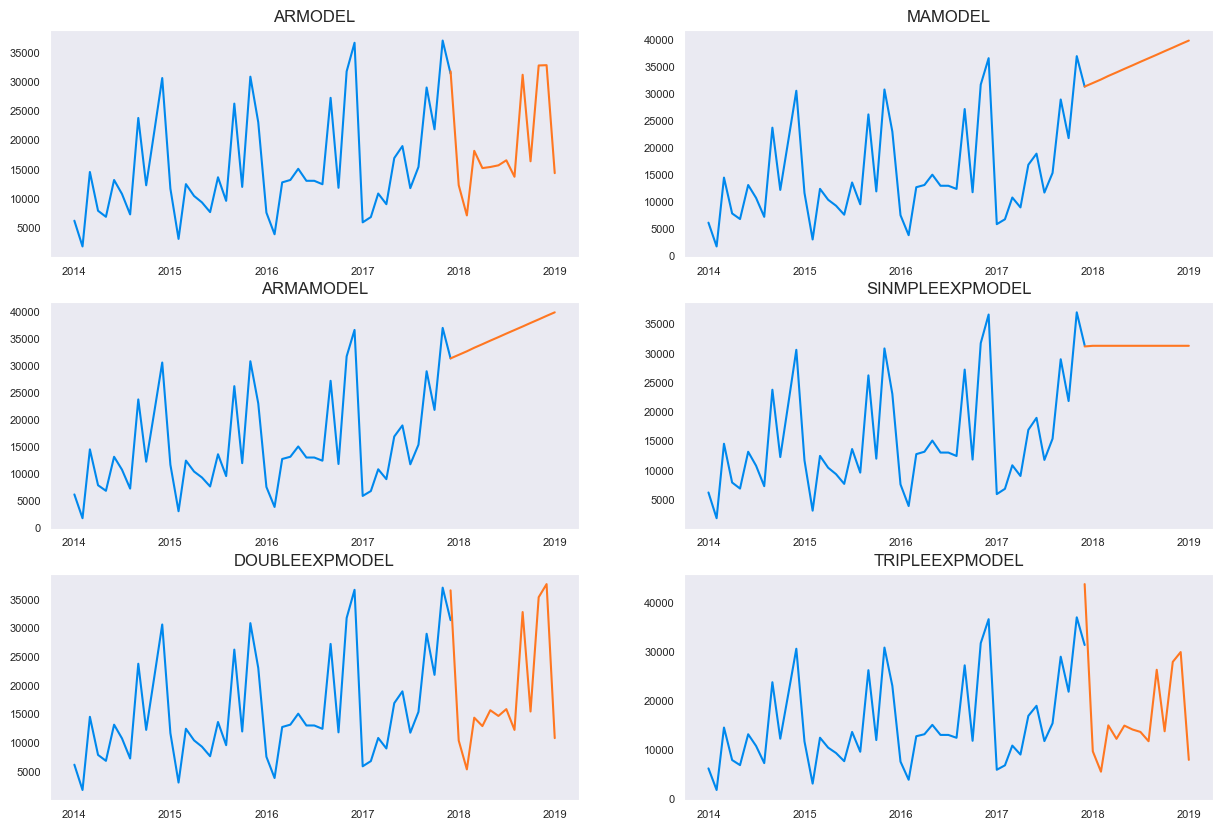

In [442]:


fig,ax = plt.subplots(3,2,figsize=(15,10))
ax[0,0].plot(ts.fur)
ax[0,0].plot(fur_model.predict(st,ed))
ax[0,0].set_title('ARMODEL')
             

ax[0,1].plot(ts.fur)
ax[0,1].plot(ma_fur.predict(st,ed))
ax[0,1].set_title('MAMODEL')


ax[1,0].plot(ts.fur)
ax[1,0].plot(arma_fur.predict(st,ed))
ax[1,0].set_title('ARMAMODEL')

ax[1,1].plot(ts.fur)
ax[1,1].plot(sim.predict(st,ed))
ax[1,1].set_title('SINMPLEEXPMODEL')


ax[2,0].plot(ts.fur)
ax[2,0].plot(doub_sm.predict(st,ed))
ax[2,0].set_title('DOUBLEEXPMODEL')


ax[2,1].plot(ts.fur)
ax[2,1].plot(trip_sm.predict(st,ed))
ax[2,1].set_title('TRIPLEEXPMODEL')

# Interpretation
 - Based on the Error values obtained from various time series models & forecasting results we can select DOUBLE EXPONENTIAL as the best model for the problem

# Forecasting for Furniture Sales

<AxesSubplot:xlabel='Order Date'>

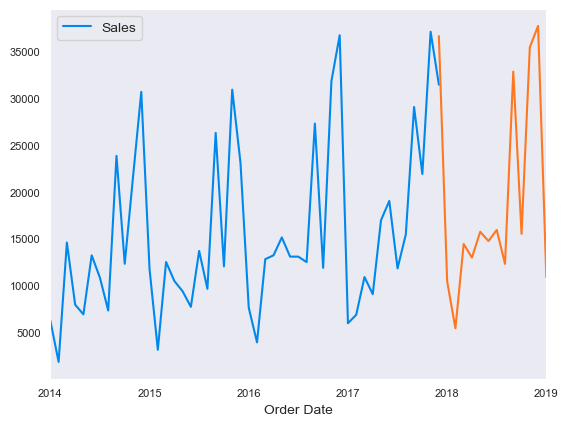

In [440]:
ts.fur.plot()
doub_sm.predict(st,ed).plot()

# Interpretation
- The Future Sales of Furniture is forecasted to increase in the last quarter of 2018

 # Forecasting for Technology Sales

In [443]:
tech_model = ExponentialSmoothing(ts.tech,trend='add',seasonal='multiplicative').fit()
print(tech_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                     2412466081.800
Optimized:                         True   AIC                            883.170
Trend:                         Additive   BIC                            913.110
Seasonal:                Multiplicative   AICC                           906.756
Seasonal Periods:                    12   Date:                 Tue, 31 Jan 2023
Box-Cox:                          False   Time:                         19:51:44
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1464286                alpha                 True
smoothing_trend          

<AxesSubplot:xlabel='Order Date'>

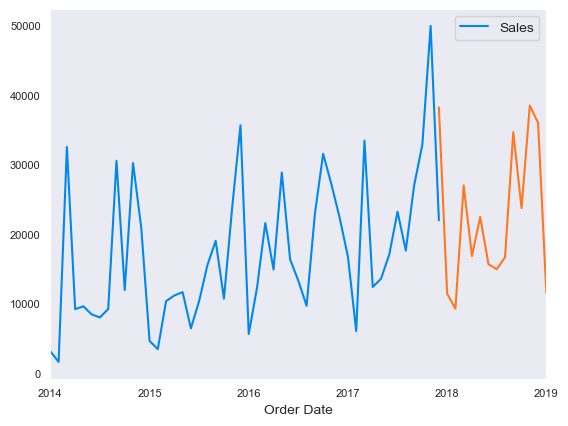

In [444]:
ts.tech.plot()
tech_model.predict(st,ed).plot()

# Interpretation
- The Future sales of Technology is estimated to decrease and slight increase from the year2019

# Forecasting for Office supplies 

In [445]:
adftest(ts.office)

0.329487275494728
not stationary use diff


In [446]:
diff = ts.office-ts.office.shift()
diff = diff.dropna()
diff

,Sales
Order Date,
2014-02-01,-3779.356
2014-03-01,7534.155
2014-04-01,2549.195
2014-05-01,-4019.450
2014-06-01,5817.413
2014-07-01,2168.171
2014-08-01,-3741.746
2014-09-01,16043.836
2014-10-01,-20212.170


In [447]:
adftest(diff)

0.0004287262459097803
stationary


In [456]:
tr = ts.office.iloc[:rec]
tt = ts.office.iloc[rec:]

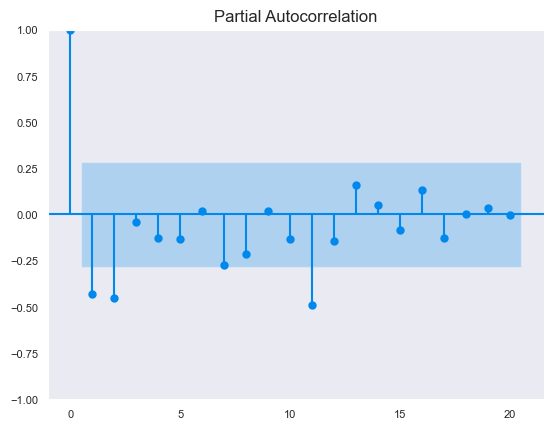

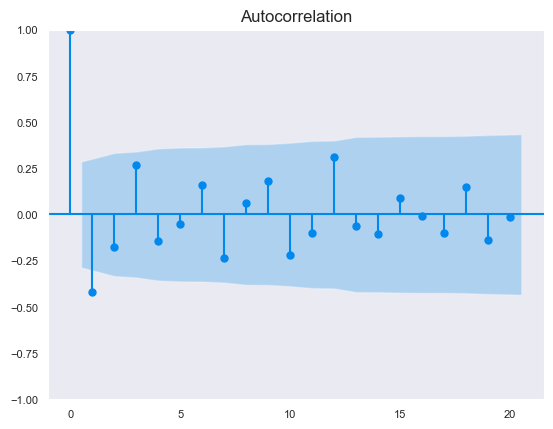

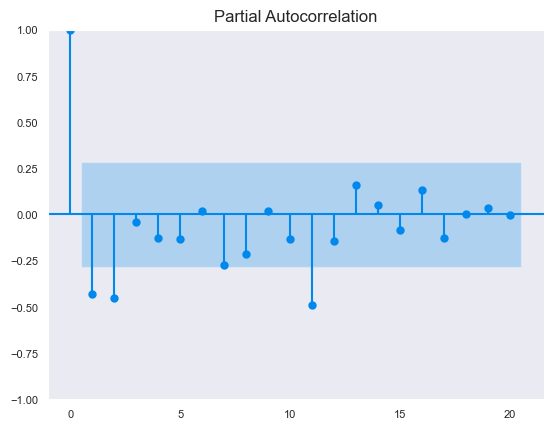

In [448]:
plot_acf(diff,lags=20)
plot_pacf(diff,lags=20)

# Interpretation
- p value is 3 [1,2,3]
- q value is 1

In [450]:
Hyperparametertuning(ts.office,4,2)

,order,AIC
0,"[1, 0, 1]",1003.870983
2,"[3, 0, 1]",1004.957458
1,"[2, 0, 1]",1005.882737


In [451]:
from statsmodels.tsa.api import statespace

In [455]:
result=[]
order=[]

for P in range(1,3):
    for Q in range(1,3):
        sari_mod = statespace.SARIMAX(ts.office,order=(1,1,1),seasonal_order=(P,1,Q,10)).fit()
        order.append([P,1,Q])
        result.append(sari_mod.aic)
s=pd.DataFrame({'order':order,'AIC':result})
s= s.sort_values('AIC')
s

,order,AIC
0,"[1, 1, 1]",798.050676
1,"[1, 1, 2]",799.919401
2,"[2, 1, 1]",799.936201
3,"[2, 1, 2]",801.918623


# SARIMA MODEL 

In [457]:
sarima_mod = statespace.SARIMAX(tr,order=(1,1,1),seasonal_order=(1,1,1,10)).fit()
print(sarima_mod.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   33
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 10)   Log Likelihood                -231.937
Date:                            Tue, 31 Jan 2023   AIC                            473.875
Time:                                    20:07:08   BIC                            479.330
Sample:                                01-01-2014   HQIC                           475.160
                                     - 09-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1666      0.891      0.187      0.852      -1.581       1.914
ma.L1         -0.7795      0.561   

In [467]:
off_fct = sarima_mod.predict(len(ts.office)-1,len(ts.office)+36)
off_fct

2017-12-01    17014.301244
2018-01-01    18728.826999
2018-02-01    16979.986081
2018-03-01    22948.637186
2018-04-01    16568.001748
2018-05-01    25672.880744
2018-06-01    20974.458107
2018-07-01    19124.405388
2018-08-01    19378.275230
2018-09-01    22556.781078
2018-10-01    19879.447217
2018-11-01    21441.155511
2018-12-01    19779.381846
2019-01-01    26641.968901
2019-02-01    19714.018627
2019-03-01    27641.071039
2019-04-01    23641.539251
2019-05-01    21282.983074
2019-06-01    21643.029325
2019-07-01    25336.961440
2019-08-01    22380.864530
2019-09-01    24000.030176
2019-10-01    22305.520371
2019-11-01    28831.999283
2019-12-01    22109.832178
2020-01-01    30479.731873
2020-02-01    26217.426331
2020-03-01    24050.060757
2020-04-01    24370.186076
2020-05-01    27870.324703
2020-06-01    25019.039028
2020-07-01    26616.601467
2020-08-01    24934.400020
2020-09-01    31587.251166
2020-10-01    24787.712300
2020-11-01    32991.107249
2020-12-01    28827.601178
2

<AxesSubplot:xlabel='Order Date'>

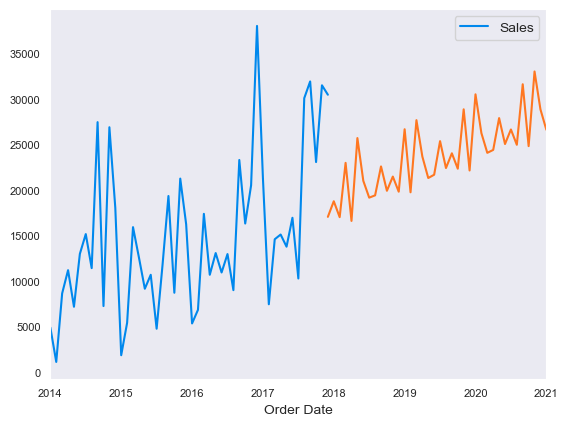

In [468]:
ts.office.plot()
off_fct.plot()

# Interpretation
- The forecast of office supplies is found to decrease in the upcoming years